In [1]:
#Introdução a deep learning com TensorFlow
#Problema de negócio: Construir um modelo de inteligência artificial capaz de classificar imagens considerando 10 categorias: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']. Dada uma nova imagem de uma dessas categorias o modelo deve ser capaz de classificar e indicar o que é a imagem.

In [2]:
#Instala o TF
#pip install -q tensorflow==2.12

In [3]:
#Silencia mensagens do TF
%env TF_CPP_MIN_LOG_LEVEL=3

env: TF_CPP_MIN_LOG_LEVEL=3


In [4]:
#imports
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [5]:
#Carregando os dados

In [6]:
#Carrega o dataset CIFAR-10
(imagens_treino, labels_treino), (imagens_teste, labels_teste) = datasets.cifar10.load_data()

In [7]:
#Classes das imagens
nomes_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [8]:
#Pré-processamento e visualização das imagens

In [9]:
#Normaliza os valores dos pixels para que os dados fiquem na mesma escala
imagens_treino = imagens_treino /255.0
imagens_teste = imagens_teste / 255.0

In [10]:
#Função para exibir as imagens
def visualiza_imagens(images, labels):
    plt.figure(figsize = (10, 10))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap = plt.cm.binary)
        plt.xlabel(nomes_classes[labels[i][0]])
    plt.show()

In [11]:
#Executa a função
visualiza_imagens(imagens_treino, labels_treino)

KeyboardInterrupt: 

In [ ]:
#Modelo
#Criar o objeto de sequência de camadas
modelo_dsa = models.Sequential()

#Adicionar o primeiro bloco de convolução e max pooling (camada de entrada)
modelo_dsa.add(layers.Conv2D(32, (3,3), activation='relu', input_shape = (32,32,3)))
modelo_dsa.add(layers.MaxPooling2D((2,2)))

#Adicionar o segundo bloco de convolução e max pooling (camada intermediária)
modelo_dsa.add(layers.Conv2D(64,(3,3), activation='relu'))
modelo_dsa.add(layers.MaxPooling2D((2,2)))

#Adicionar o segundo bloco de convolução e max pooling (camada intermediária)
modelo_dsa.add(layers.Conv2D(64,(3,3), activation='relu'))
modelo_dsa.add(layers.MaxPooling2D((2,2)))

In [ ]:
#Adicionar camadas de classificação
modelo_dsa.add(layers.Flatten())
modelo_dsa.add(layers.Dense(64, activation='relu'))
modelo_dsa.add(layers.Dense(10, activation='softmax'))

In [ ]:
#Sumário do modelo
modelo_dsa.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0

In [ ]:
#Compliação do modelo
modelo_dsa.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
%%time
history = modelo_dsa.fit(imagens_treino, labels_treino, epochs=10, validation_data=(imagens_teste, labels_teste))

Epoch 1/10
1563/1563 [==============================] - 136s 86ms/step - loss: 1.5457 - accuracy: 0.4397 - val_loss: 1.2422 - val_accuracy: 0.5575
Epoch 2/10
1563/1563 [==============================] - 124s 80ms/step - loss: 1.1664 - accuracy: 0.5881 - val_loss: 1.1030 - val_accuracy: 0.6173
Epoch 3/10
1563/1563 [==============================] - 109s 70ms/step - loss: 1.0201 - accuracy: 0.6427 - val_loss: 1.0462 - val_accuracy: 0.6450
Epoch 4/10
1563/1563 [==============================] - 133s 85ms/step - loss: 0.9239 - accuracy: 0.6793 - val_loss: 0.9358 - val_accuracy: 0.6766
Epoch 5/10
1563/1563 [==============================] - 127s 81ms/step - loss: 0.8565 - accuracy: 0.7010 - val_loss: 0.9012 - val_accuracy: 0.6835
Epoch 6/10
1563/1563 [==============================] - 167s 107ms/step - loss: 0.7953 - accuracy: 0.7239 - val_loss: 0.8808 - val_accuracy: 0.6951
Epoch 7/10
1563/1563 [==============================] - 132s 85ms/step - loss: 0.7520 - accuracy: 0.7391 - val_loss: 

In [ ]:
#Avaliação do modelo

In [ ]:
#Avalia o modelo
erro_teste, acc_teste = modelo_dsa.evaluate(imagens_teste, labels_teste, verbose = 2)

313/313 - 4s - loss: 0.8817 - accuracy: 0.7042


In [ ]:
print(f'Acurácia com Dados de teste: {acc_teste}')

Acurácia com Dados de teste: 0.704200029373169


In [ ]:
#Deploy do modelo

In [ ]:
#Carrega uma nova imagem
nova_imagem = Image.open('dados/nova_imagem.jpg')

In [ ]:
#Dimensões da imagem (em pixels)
nova_imagem.size

(1919, 1199)

In [ ]:
#Obtem a largura e altura da imagem
largura = nova_imagem.width
altura = nova_imagem.height

In [ ]:
print(f'A largura da imagem é: {largura}')
print(f'A altura da imagem é: {altura}')

A largura da imagem é: 1919
A altura da imagem é: 1199


In [ ]:
#Redimensiona para 32x32 pixels
nova_imagem = nova_imagem.resize((32,32))

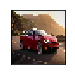

In [ ]:
#a imagem
plt.figure(figsize = (1,1))
plt.imshow(nova_imagem)
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
#Converter a imagem para um array Numpy e normaliza
nova_imagem_array = np.array(nova_imagem) / 255.0

In [ ]:
#Expande a dimensão do array para que ele tenha o formato (1,32,32,3)
nova_imagem_array = np.expand_dims(nova_imagem_array, axis=0)

In [ ]:
#Previsões
previsoes = modelo_dsa.predict(nova_imagem_array)

In [ ]:
print(previsoes)

[[1.3266994e-04 2.2567436e-01 3.8034904e-07 1.6307634e-06 6.2058989e-09
  1.5417046e-07 2.4611377e-06 3.8668318e-06 7.0563561e-05 7.7411389e-01]]


In [ ]:
#Obtem a classe com maior probabilidade e o nome da classe
classe_prevista = np.argmax(previsoes)
nome_classe_prevista = nomes_classes[classe_prevista]

In [ ]:
print(f'A nova imagem foi classificada como: {nome_classe_prevista}')

A nova imagem foi classificada como: truck
